# Introduction

This dataset, It includes the prices of audi vehicles according to their specified features.
To used regression models because 'price' is continuous feature.


### Features

* Model
* registration year
* price in £ 
* type of gearbox
* distance used
* engine fuel
* road tax
* miles per gallon
* size in litres

### Content

* Exploraty Data Analysis
    * Average price by years
    * Transmision type by years
    * Fuel types by years
    * Model types by years
    * Avarage MPG by years
    * Avarage Engine Size by years
    * General display of numerical features by year
* ML Preprocessing
    * Obtain train and test spliting process
    * Encoding categorical features for learning processes
       * Used to Label encoder.
    * Train and test split
* Learning Time !
  * Linear Regression
    * Learning Curve
  * Decision tree regressor
    * Learning Curve
  * Random Forest regressor
    * Learning Curve

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Exploraty Data Analysis

In [2]:
# read csv file 
data = pd.read_csv('audi.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [4]:
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [5]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### Average price over the years

In [6]:
years = data.year.unique()
years 

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997],
      dtype=int64)

In [7]:
year_prices = []

for i in years:
    year_prices.append(data[data['year'] == i].price.mean())

In [8]:
# obtaining new dataframe for avarage prices with year

df_year_prices = pd.DataFrame({'Year' : years , 'Avarage prices' : year_prices})
df_year_prices

,Year,Avarage prices
0,2017,19951.624289
1,2016,16908.725051
2,2019,30410.752268
3,2015,15128.235235
4,2014,13890.659955
5,2018,26296.707176
6,2013,11690.790378
7,2020,35967.067039
8,2004,5053.600000
9,2009,6281.956522


In [9]:
# sorting data 
new_indexes = []
new_indexes = df_year_prices['Avarage prices'].sort_values(ascending = False).index
sorted_data_prices = df_year_prices.reindex(new_indexes)
sorted_data_prices

,Year,Avarage prices
7,2020,35967.067039
2,2019,30410.752268
5,2018,26296.707176
0,2017,19951.624289
1,2016,16908.725051
3,2015,15128.235235
4,2014,13890.659955
6,2013,11690.790378
10,2012,9860.811765
13,2011,8944.808511


In [10]:
new_indexes

Int64Index([7, 2, 5, 0, 1, 3, 4, 6, 10, 13, 12, 11, 18, 9, 14, 8, 19, 20, 16,
            15, 17],
           dtype='int64')

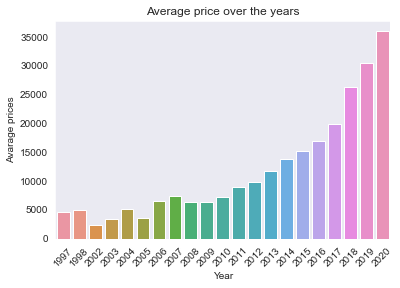

In [11]:
sns.barplot(x = 'Year', y = 'Avarage prices' , data = df_year_prices)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Avarage prices')
plt.title('Average price over the years')
plt.show()

### Transmision type by year

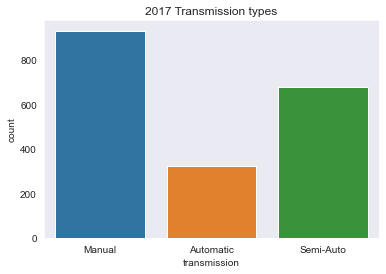

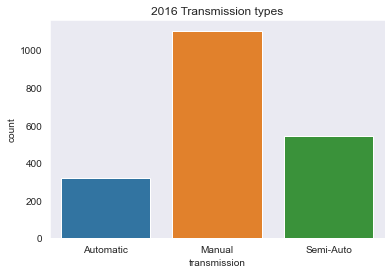

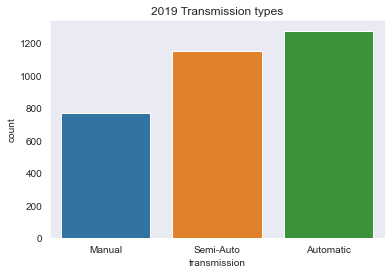

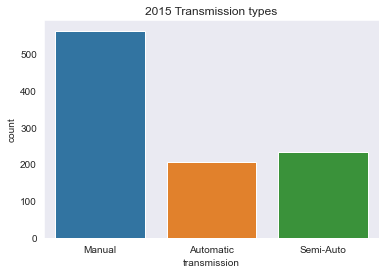

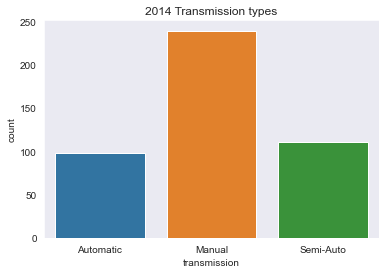

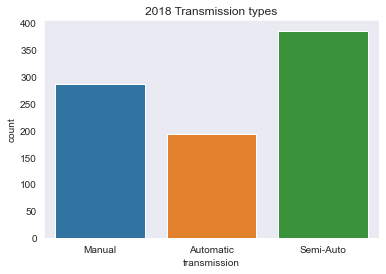

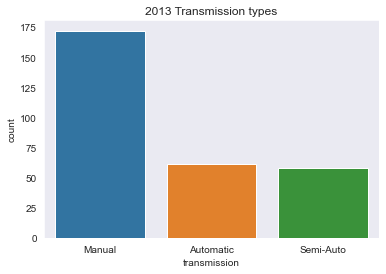

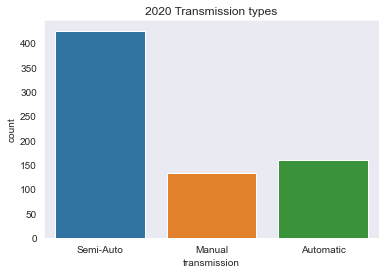

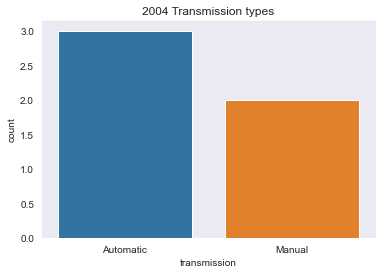

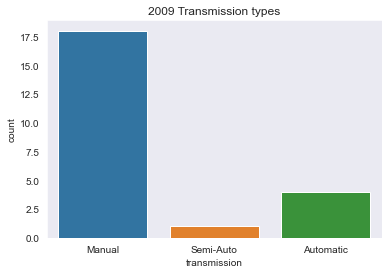

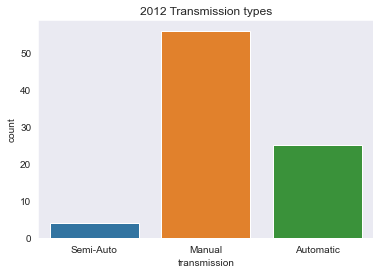

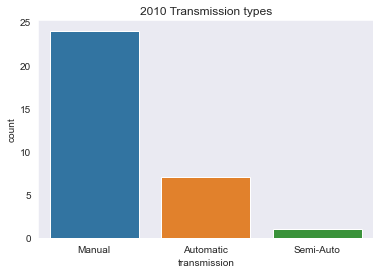

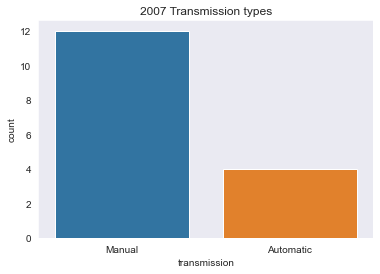

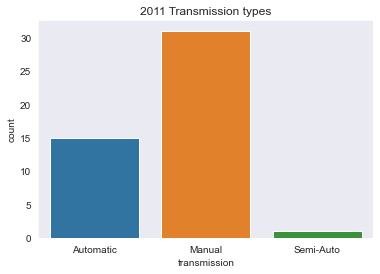

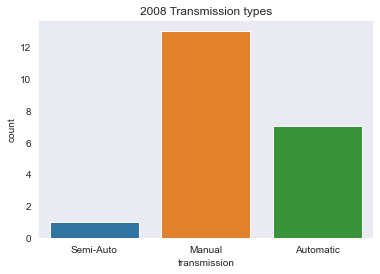

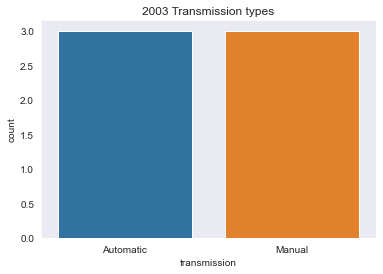

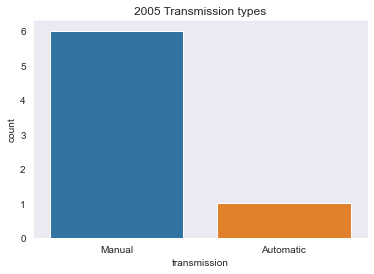

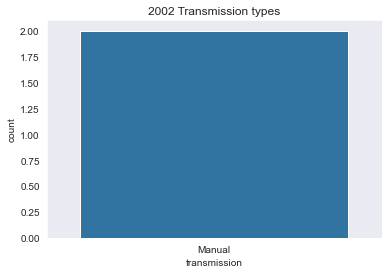

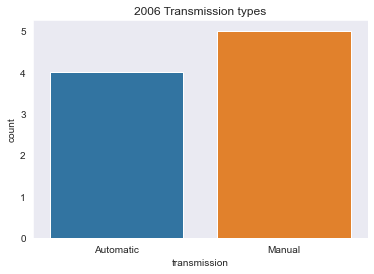

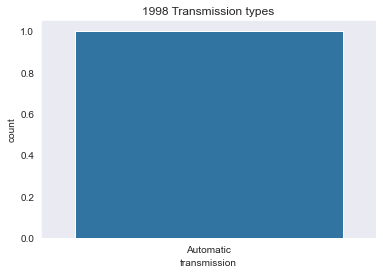

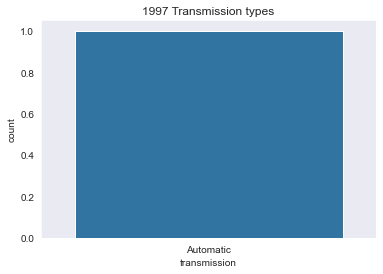

In [12]:
for i in years:
    sns.countplot(data[data['year'] == i].transmission)
    plt.title('{} Transmission types'.format(i))
    plt.show()

### Fuel types by year

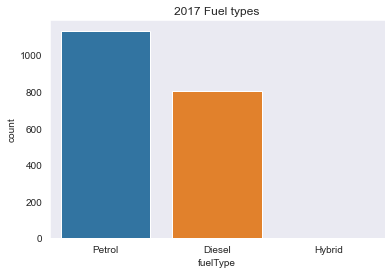

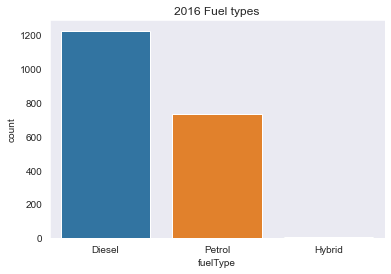

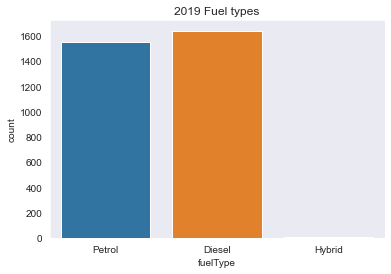

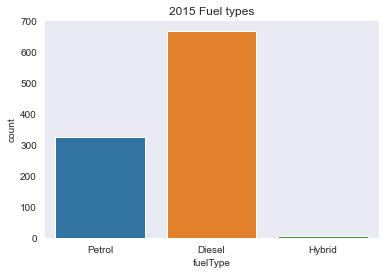

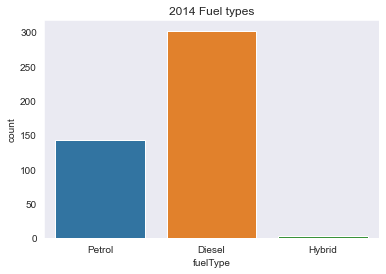

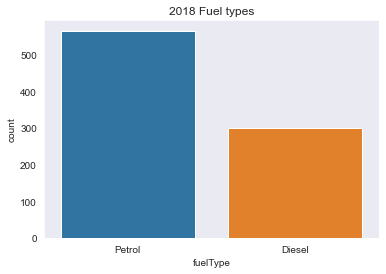

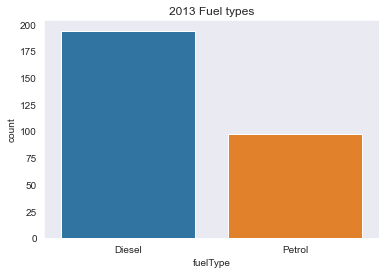

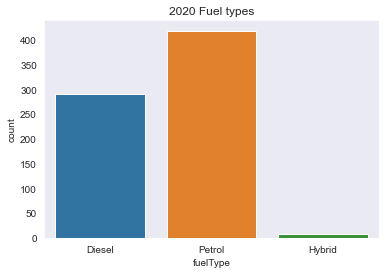

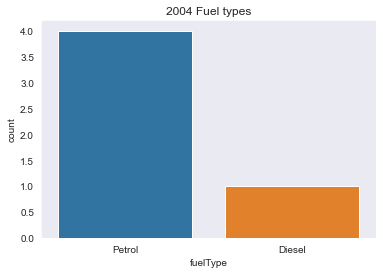

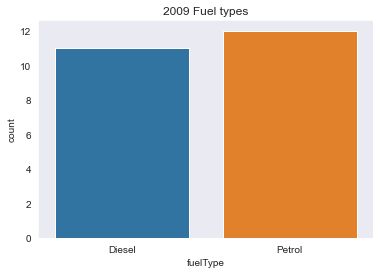

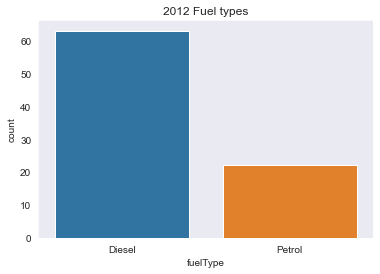

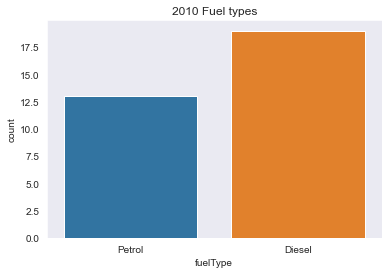

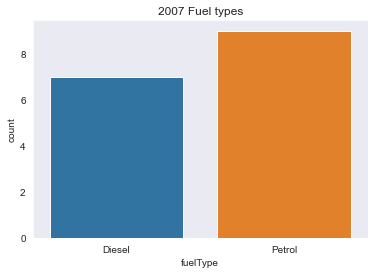

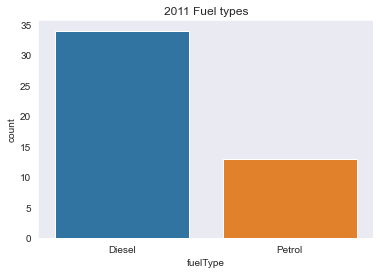

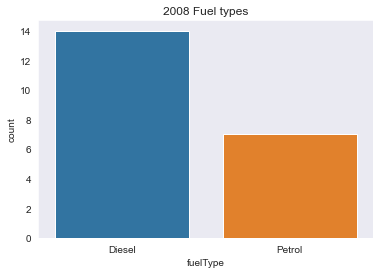

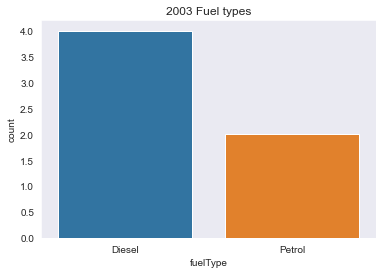

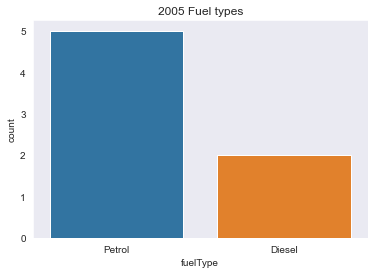

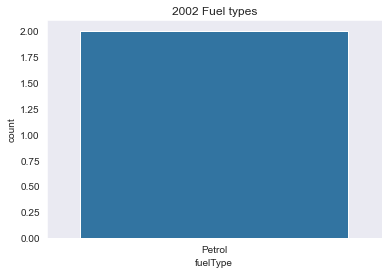

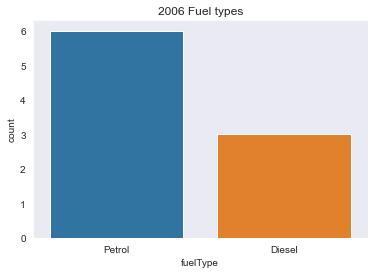

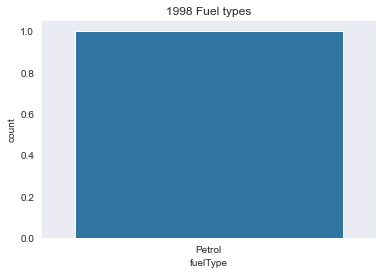

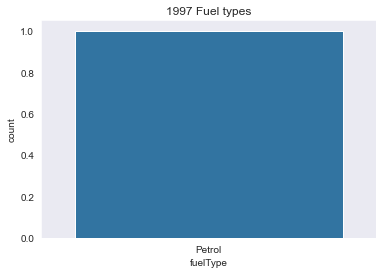

In [13]:
for i in years:
    sns.countplot(data[data['year'] == i].fuelType)
    plt.title('{} Fuel types'.format(i))
    plt.show()

### Model types by years

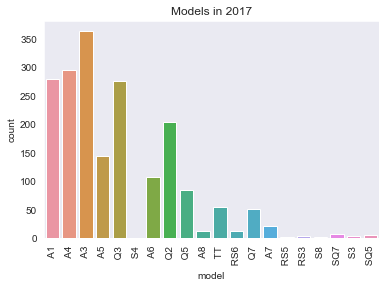

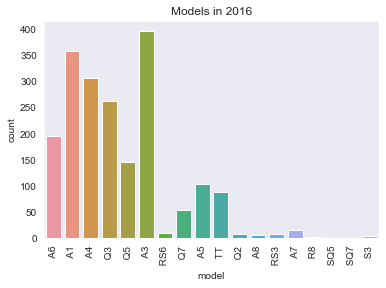

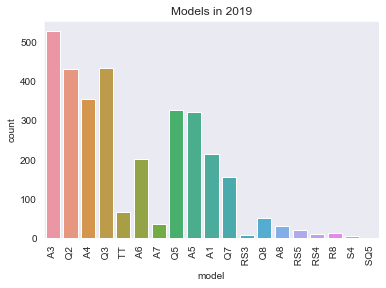

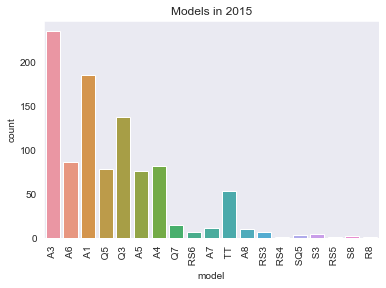

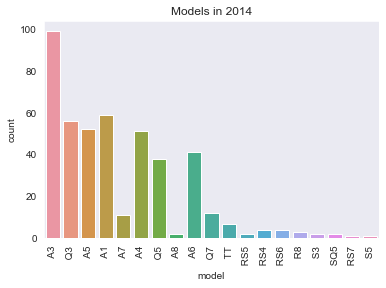

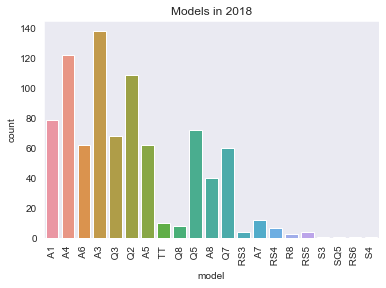

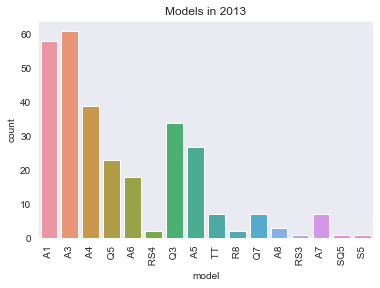

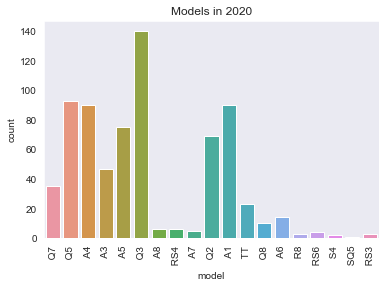

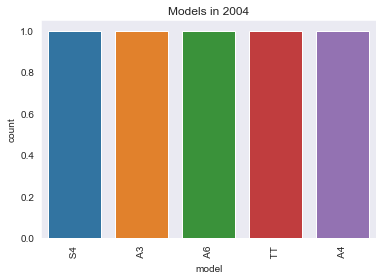

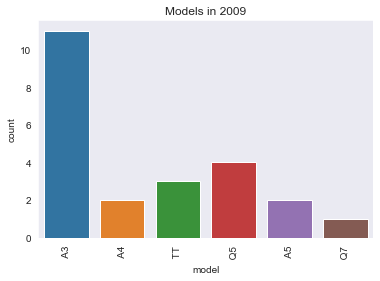

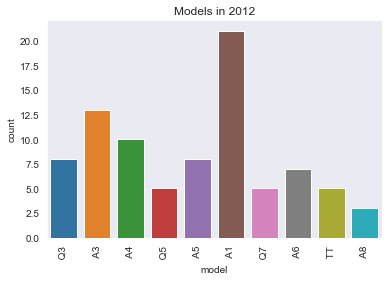

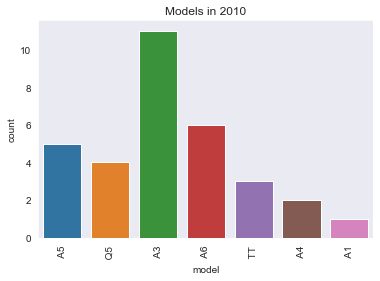

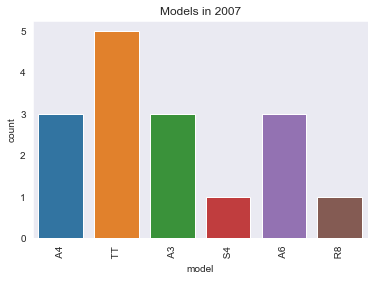

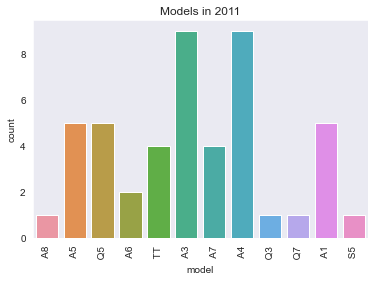

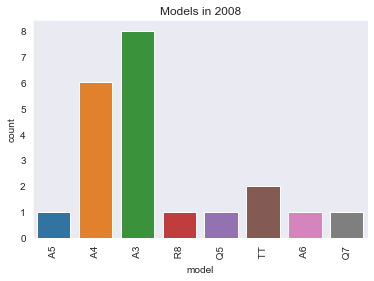

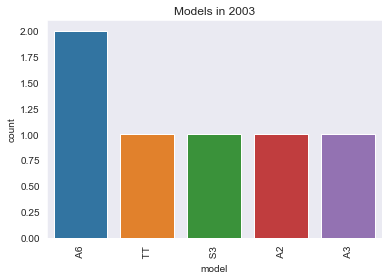

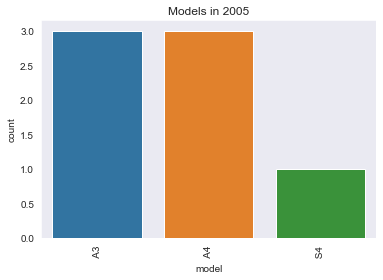

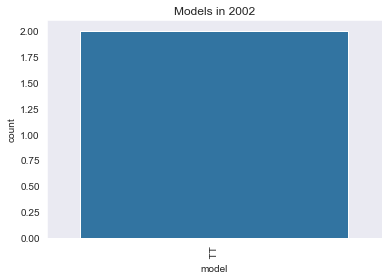

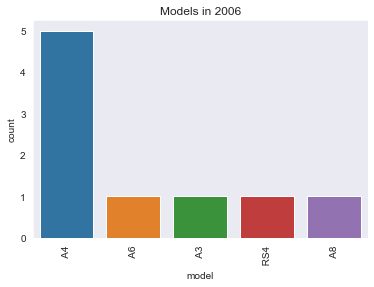

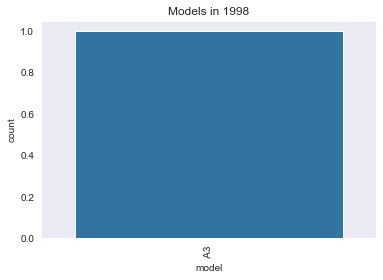

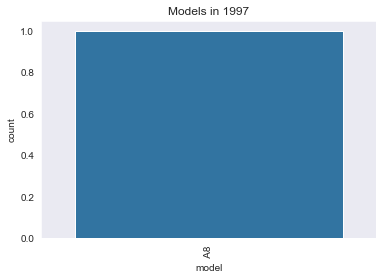

In [14]:
for i in years:
    sns.countplot(data[data['year'] == i].model)
    plt.title('Models in {}'.format(i))
    plt.xticks(rotation = 90)
    plt.show()
    

### Average taxes over the years

In [15]:
year_tax = []

for i in years:
    year_tax.append(data[data['year'] == i].tax.mean())    

In [16]:
# obtaining to new dataframe for avarage taxes for by years

df_year_tax = pd.DataFrame({'Year' : years , 'Avarage taxes' : year_tax})
df_year_tax

,Year,Avarage taxes
0,2017,123.170543
1,2016,85.063646
2,2019,145.573976
3,2015,98.953954
4,2014,129.026846
5,2018,146.174769
6,2013,125.979381
7,2020,145.537709
8,2004,319.000000
9,2009,223.478261


In [17]:
# sorting taxes avarage values
new_indexes = []
new_indexes = df_year_tax['Avarage taxes'].sort_values(ascending = False).index.values
sorted_data = df_year_tax.reindex(new_indexes)
sorted_data

,Year,Avarage taxes
18,2006,371.111111
12,2007,340.937500
8,2004,319.000000
17,2002,310.000000
16,2005,269.285714
20,1997,265.000000
19,1998,265.000000
15,2003,255.833333
14,2008,252.380952
9,2009,223.478261


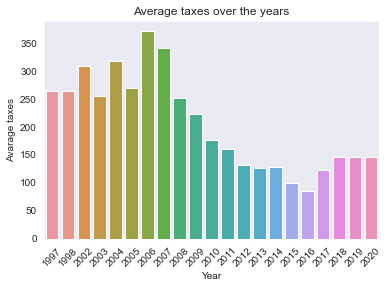

In [18]:
sns.barplot(x = 'Year', y = 'Avarage taxes' , data = sorted_data)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Avarage taxes')
plt.title('Average taxes over the years')
plt.show()

### Avarage MPG for by years

In [19]:
year_mpg = []

for i in years:
    year_mpg.append(data[data['year'] == i].mpg.mean())
    
year_mpg

[55.87689922480607,
 58.48289205702656,
 42.13359399436921,
 58.43743743743768,
 55.039149888143186,
 50.041435185185435,
 54.78625429553254,
 41.532402234636976,
 28.98,
 43.573913043478264,
 54.48235294117647,
 47.775000000000006,
 36.69375,
 50.0936170212766,
 41.77619047619047,
 41.71666666666667,
 36.32857142857143,
 30.1,
 32.68888888888889,
 30.4,
 18.9]

In [20]:
# obtaining to new dataframe for avarage taxes for by years

df_year_mpg = pd.DataFrame({'Year' : years , 'Avarage mpg' : year_mpg})
df_year_mpg

,Year,Avarage mpg
0,2017,55.876899
1,2016,58.482892
2,2019,42.133594
3,2015,58.437437
4,2014,55.039150
5,2018,50.041435
6,2013,54.786254
7,2020,41.532402
8,2004,28.980000
9,2009,43.573913


In [21]:
# sorting mpg avarage values
new_indexes = []
new_indexes = (df_year_mpg['Avarage mpg'].sort_values(ascending = False)).index.values
sorted_data_mpg = df_year_mpg.reindex(new_indexes)
sorted_data_mpg

,Year,Avarage mpg
1,2016,58.482892
3,2015,58.437437
0,2017,55.876899
4,2014,55.039150
6,2013,54.786254
10,2012,54.482353
13,2011,50.093617
5,2018,50.041435
11,2010,47.775000
9,2009,43.573913


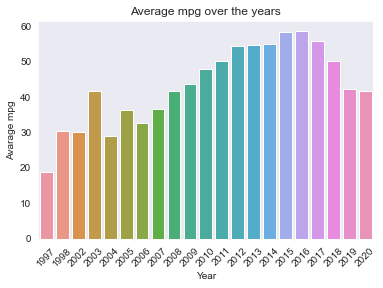

In [22]:
sns.barplot(x =  sorted_data_mpg['Year'], y =  sorted_data_mpg['Avarage mpg'])
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Avarage mpg')
plt.title('Average mpg over the years')
plt.show()

### Avarage engine size for by years

In [23]:
year_engineSize = []

for i in years:
    year_engineSize.append(data[data['year'] == i].engineSize.mean())
    
year_engineSize

[1.833540051679602,
 1.8866089613034718,
 1.9545511416953458,
 1.9578578578578567,
 2.0494407158836685,
 1.9879629629629691,
 1.9529209621993133,
 1.9409217877094969,
 2.8600000000000003,
 2.0304347826086957,
 2.010588235294117,
 1.91875,
 2.5375,
 2.1808510638297873,
 2.228571428571428,
 2.216666666666667,
 2.085714285714286,
 1.8,
 2.9555555555555553,
 1.8,
 4.2]

In [24]:
# obtaining to new dataframe for avarage taxes for by years

df_year_engineSize = pd.DataFrame({'Year' : years , 'Avarage engine size' : year_engineSize})
df_year_engineSize

,Year,Avarage engine size
0,2017,1.833540
1,2016,1.886609
2,2019,1.954551
3,2015,1.957858
4,2014,2.049441
5,2018,1.987963
6,2013,1.952921
7,2020,1.940922
8,2004,2.860000
9,2009,2.030435


In [25]:
# sorting mpg avarage values
new_indexes = []
new_indexes = (df_year_engineSize['Avarage engine size'].sort_values(ascending = False)).index.values
sorted_data_engineSize = df_year_engineSize.reindex(new_indexes)
sorted_data_engineSize

,Year,Avarage engine size
20,1997,4.200000
18,2006,2.955556
8,2004,2.860000
12,2007,2.537500
14,2008,2.228571
15,2003,2.216667
13,2011,2.180851
16,2005,2.085714
4,2014,2.049441
9,2009,2.030435


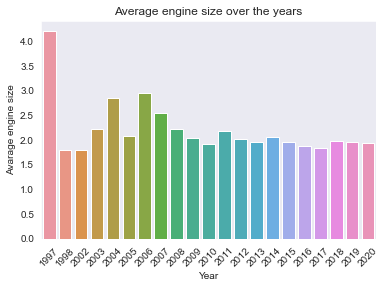

In [26]:
sns.barplot(x =  sorted_data_engineSize['Year'], y =  sorted_data_engineSize['Avarage engine size'])
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Avarage engine size')
plt.title('Average engine size over the years')
plt.show()

### General display of numerical features by year

In [27]:
# Normalization
year_prices_norm = df_year_prices['Avarage prices'] / max(df_year_prices['Avarage prices'])
year_prices_norm

0     0.554719
1     0.470117
2     0.845517
3     0.420614
4     0.386205
5     0.731133
6     0.325042
7     1.000000
8     0.140506
9     0.174659
10    0.274162
11    0.200853
12    0.203665
13    0.248694
14    0.174644
15    0.094763
16    0.097053
17    0.067645
18    0.180696
19    0.138988
20    0.129285
Name: Avarage prices, dtype: float64

In [28]:
# Normalization
year_tax_norm = df_year_tax['Avarage taxes'] / max(df_year_tax['Avarage taxes'])
year_tax_norm

0     0.331897
1     0.229213
2     0.392265
3     0.266642
4     0.347677
5     0.393884
6     0.339465
7     0.392167
8     0.859581
9     0.602187
10    0.356006
11    0.474925
12    0.918694
13    0.431711
14    0.680068
15    0.689371
16    0.725620
17    0.835329
18    1.000000
19    0.714072
20    0.714072
Name: Avarage taxes, dtype: float64

In [29]:
# Normalization
year_mpg_norm = df_year_mpg['Avarage mpg'] / max(df_year_mpg['Avarage mpg'])
year_mpg_norm

0     0.955440
1     1.000000
2     0.720443
3     0.999223
4     0.941115
5     0.855659
6     0.936791
7     0.710163
8     0.495530
9     0.745071
10    0.931595
11    0.816906
12    0.627427
13    0.856552
14    0.714332
15    0.713314
16    0.621183
17    0.514680
18    0.558948
19    0.519810
20    0.323171
Name: Avarage mpg, dtype: float64

In [30]:
# Normalization
year_engineSize_norm = df_year_engineSize['Avarage engine size'] / max(df_year_engineSize['Avarage engine size']) 
year_engineSize_norm

0     0.436557
1     0.449193
2     0.465369
3     0.466157
4     0.487962
5     0.473325
6     0.464981
7     0.462124
8     0.680952
9     0.483437
10    0.478711
11    0.456845
12    0.604167
13    0.519250
14    0.530612
15    0.527778
16    0.496599
17    0.428571
18    0.703704
19    0.428571
20    1.000000
Name: Avarage engine size, dtype: float64

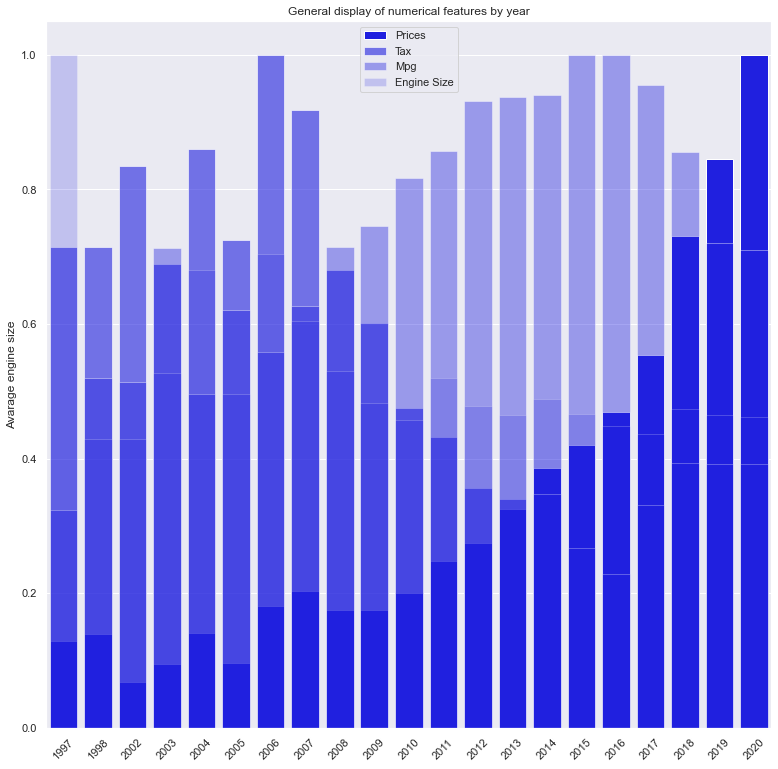

In [31]:
sns.set(rc={'figure.figsize':(13,13)})
sns.barplot(x = years , y = year_prices_norm  , color='blue',alpha = 1 , label='Prices')
sns.barplot(x = years , y = year_tax_norm  , color = 'blue' , alpha = 0.6 , label = 'Tax')
sns.barplot(x = years , y = year_mpg_norm  , color = 'blue' , alpha = 0.4 , label = 'Mpg')
sns.barplot(x = years , y = year_engineSize_norm  , color = 'blue' , alpha = 0.2 , label = 'Engine Size')
plt.legend()
plt.xticks(rotation = 45)
plt.title('General display of numerical features by year')
plt.show()

### Obtain train and test spliting process

In [32]:
# Obtain a X variable 
X = data.drop('price' , axis = 1).values
X

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [33]:
# Obtain a labels 
y = data['price'].values
y 

array([12500, 16500, 11000, ..., 17199, 19499, 15999], dtype=int64)

### Encoding categorical features for learning processes

In [34]:
# Model encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [35]:
X[:,0]

array([0, 5, 0, ..., 2, 9, 9], dtype=object)

In [36]:
# Transmission encoding 
X[:, 2] = le.fit_transform(X[:, 2]) 

In [37]:
X[:,2]

array([1, 0, 1, ..., 1, 0, 1], dtype=object)

In [38]:
# Fuel type encoding
X[:,4] = le.fit_transform(X[:, 4])
X[:,4]

array([2, 0, 2, ..., 2, 2, 2], dtype=object)

### Train and test split

In [39]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [40]:
print(X_train.shape)
print(X_test.shape)

(8534, 8)
(2134, 8)


### Learning Time !

#### Linear regression

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# crossvalidation and randomizedsearchCV
grid = {'n_jobs': [-1,1] , 'fit_intercept': [True , False]}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(lr, grid, cv = 10)
rs.fit(X_train, y_train)
print('Best hyperparameters: {}'.format(rs.best_params_))
print('Best validation score is : {}'.format(rs.best_score_))

Best hyperparameters: {'n_jobs': -1, 'fit_intercept': True}
Best validation score is : 0.7802389806128873


In [42]:
# testing with testset 
lr = LinearRegression(n_jobs = -1, fit_intercept = True)

lr.fit(X_train, y_train)
lr_score = lr.score(X_train, y_train)
print('Linear Regression score is : {}'.format(lr_score))
lr_predict = lr.predict(X_test)

Linear Regression score is : 0.7837104554790122


In [43]:
X_train.shape

(8534, 8)

### Learning curve

In [44]:
# copy the data for learnin curve processes
data_curve = data.copy()

# encoding categorical columns
data_curve.iloc[:,0] = le.fit_transform(data_curve.iloc[:,0])
data_curve.iloc[:,3] = le.fit_transform(data_curve.iloc[:,3])
data_curve.iloc[:,5] = le.fit_transform(data_curve.iloc[:,5])

In [45]:
data_curve.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [54]:
# first of all declare the train sizes for validations.
train_sizes = [1, 100, 500, 2000, 5000, 8534]

from sklearn.model_selection import learning_curve

features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
target = 'price'

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(n_jobs = -1, fit_intercept = True),
X = data_curve[features],
y = data_curve[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[       -0.                -0.                -0.
         -0.                -0.        ]
 [ -6327816.07898075  -2807187.88491493  -2807187.88491493
   -2807187.88491493  -2807187.88491493]
 [-21051046.73022018 -16344591.15345392 -16344591.15345392
  -16344591.15345392 -16344591.15345392]
 [-24848424.87555202 -19165598.09958224 -19165598.09958224
  -19165598.09958224 -19165598.09958224]
 [-28472220.94713152 -25917532.53292806 -22422973.06759976
  -26831366.32217816 -26831366.32217816]
 [-31696483.99984728 -29533673.90487947 -26549595.04717141
  -27692177.07574455 -29474014.33173686]]

 ----------------------------------------------------------------------

Validation scores:

 [[-1.73675316e+08 -2.40391243e+08 -4.07495976e+08 -2.09183715e+08
  -1.81568545e+08]
 [-2.25549370e+07 -7.47696856e+07 -1.29331872e+08 -5.95838253e+07
  -5.16460941e+07]
 [-2.05045799e+07 -3.23491212e+07 -4.57604104e+07 -3.21481255e+07
  -3.10152519e+07]
 [-1.98148133e+07 -2.80449993e+07 -3.9

In [55]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
100     3.511314e+06
500     1.728588e+07
2000    2.030216e+07
5000    2.609509e+07
8534    2.898919e+07
dtype: float64

 --------------------

Mean validation scores

 1       2.424630e+08
100     6.757728e+07
500     3.235550e+07
2000    3.030182e+07
5000    3.220726e+07
8534    3.164295e+07
dtype: float64


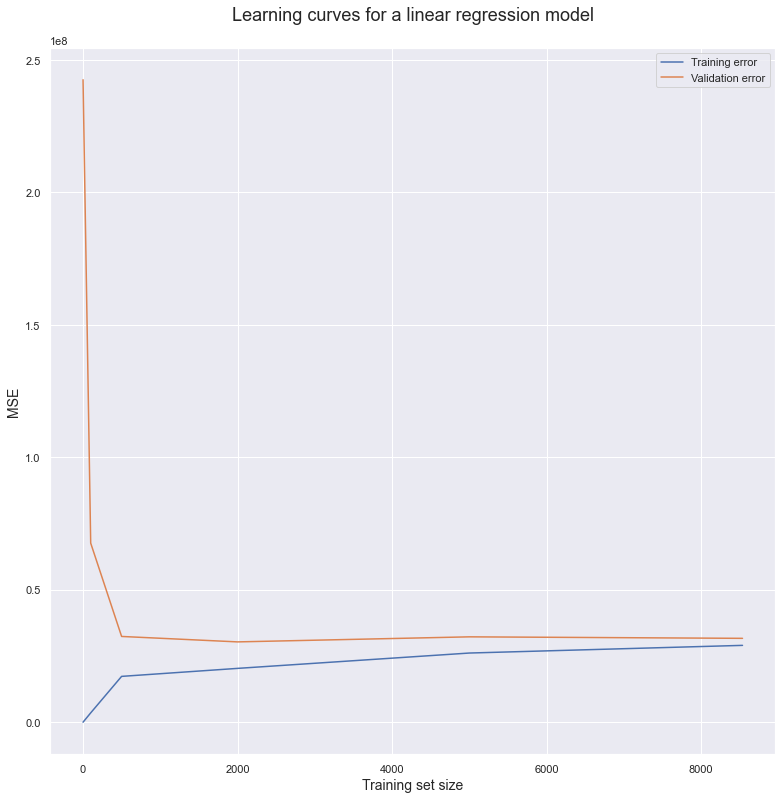

In [56]:
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

* Not bad bayes perform! our gap where between training and validation eror.
* We can analyz with the gap.
* Our gap looks like a the regressor has a good perform.

#### DecisionTree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# crossvalidation and hyperparameters tuning 
grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 
        'splitter' : ['best', 'random'], 
        'max_depth' : [0.1 , 1 , 10 , 100]}
rs = RandomizedSearchCV(dt, grid, cv = 10)
rs.fit(X_train, y_train)
print('Best hyperparameters: {}'.format(rs.best_params_))
print('Best score is: {}'.format(rs.best_score_))

Best hyperparameters: {'splitter': 'best', 'max_depth': 10, 'criterion': 'mse'}
Best score is: 0.9342238740046621


* Our best score is good but decision trees often has overfitting so we should analyz the learning curve after the test processing.

In [77]:
dt = DecisionTreeRegressor(splitter = 'best', criterion = 'mse', max_depth = 5)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print('Decision Tree score: {}'.format(dt_score))

Decision Tree score: 0.8763910974270952


* We changed to max_depth because yes our score is very good perform bu when we analyz the learning curve where given in below, that has bayes diffrences so we changed the max_depth with 5.

### Learning curve 

In [78]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = DecisionTreeRegressor(splitter ='best', max_depth = 5, criterion = 'mse'), 
                                                              X = data_curve[features], 
                                                              y = data[target], train_sizes = train_sizes, cv = 10 , 
                                                              scoring = 'neg_mean_squared_error')
print('Train Scores')
print(train_scores)
print('-' * 70)
print('Validation Scores')
print(validation_scores)

Train Scores
[[       -0.                -0.                -0.
         -0.                -0.                -0.
         -0.                -0.                -0.
         -0.        ]
 [ -2620328.72950033  -2020052.44047619  -2020052.44047619
   -2020052.44047619  -2020052.44047619  -2020052.44047619
   -2020052.44047619  -2020052.44047619  -2020052.44047619
   -2020052.44047619]
 [ -6438066.15293864 -11468086.57626921 -11468086.57626921
  -11468086.57626921 -11468086.57626921 -11468086.57626921
  -11468086.57626921 -11468086.57626921 -11468086.57626921
  -11468086.57626921]
 [-12127545.83854814 -13644519.09275362 -14478795.81441129
  -14478795.81441129 -14478795.81441129 -14478795.81441129
  -14478795.81441129 -14478795.81441129 -14478795.81441129
  -14478795.81441129]
 [-17540263.12030376 -18551310.20803744 -18423886.74129903
  -15759207.64814893 -16538585.9923207  -17411706.99061871
  -17411706.99061871 -17411706.99061871 -17411706.99061871
  -17411706.99061871]
 [-17623263.0088

In [86]:
# train and validation scores's means 
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Train scores mean')
print(pd.Series(train_scores_mean, train_sizes))
print('-' * 70)
print('Validation scores mean')
print(pd.Series(validation_scores_mean, train_sizes))

Train scores mean
1      -0.000000e+00
100     2.080080e+06
500     1.096508e+07
2000    1.416024e+07
5000    1.738718e+07
8534    1.752158e+07
dtype: float64
----------------------------------------------------------------------
Validation scores mean
1       2.453080e+08
100     1.040364e+08
500     3.685697e+07
2000    2.415592e+07
5000    2.606661e+07
8534    2.135484e+07
dtype: float64


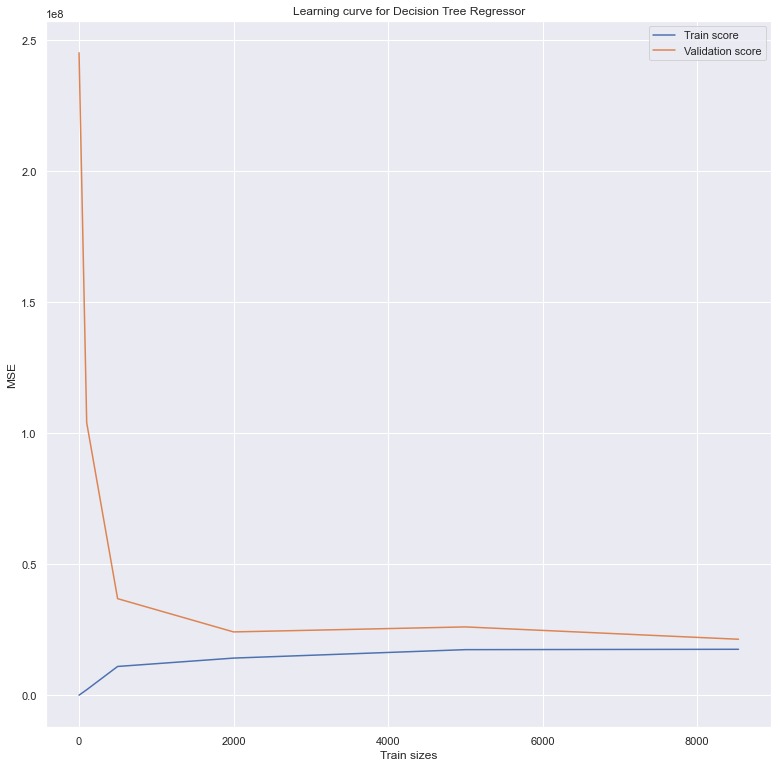

In [87]:
plt.plot(train_sizes, train_scores_mean, label = 'Train score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.legend(loc = 'best')
plt.xlabel('Train sizes')
plt.ylabel('MSE')
plt.title('Learning curve for Decision Tree Regressor')
plt.show()

* Actually we had not half bad bayes diffrences
* And our training data has no typical pattern so we has no overfitting 
* But try the minimize diffrences.
* We tried to increase the max_depth and it was a succesfully.

### RandomForest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# crossvalidation and hpyperparameter tuning 
grid = {'n_estimators' : [1, 10, 100]}
rs = RandomizedSearchCV(rf, grid, cv = 10)
rs.fit(X_train, y_train)
print('Best hyperparameters: {}'.format(rs.best_params_))
print('Best validation score is : {}'.format(rs.best_score_))

Best hyperparameters: {'n_estimators': 100}
Best validation score is : 0.9583886787689238


### Learning curve

In [92]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestRegressor(n_estimators = 10), 
                                                              X = data_curve[features], 
                                                              y = data[target], train_sizes = train_sizes, cv = 10 , 
                                                              scoring = 'neg_mean_squared_error')
print('Train Scores')
print(train_scores)
print('-' * 70)
print('Validation Scores')
print(validation_scores)

Train Scores
[[      -0.               -0.               -0.               -0.
        -0.               -0.               -0.               -0.
        -0.               -0.        ]
 [-4795328.36049065  -711870.912       -554885.9225      -647831.8113
   -631379.5909      -548445.2308      -615842.4414      -976623.8433
   -682442.0312      -715804.5607    ]
 [-1893745.37952178 -3034322.88776    -2280951.62939179 -2403831.11173457
  -2827514.16653944 -2275495.97529278 -2256878.94856778 -2736737.23629889
  -2735620.96657944 -2723340.74505667]
 [-1075210.17125196 -1436596.90581745 -1467665.49039679 -1898929.400982
  -1749051.42937205 -1925401.8197962  -1515859.55907321 -1711417.71226212
  -1721167.63163082 -1758468.01014071]
 [-1392132.35274781 -1240787.3451435  -1374954.51656759 -1200694.78637505
  -1224817.90842092 -1164399.6304634  -1236221.61490098 -1157302.96580143
  -1306107.87074253 -1415674.94421762]
 [-1125157.00519275 -1151127.80452829 -1192633.01852275 -1100446.73114414
  -1

* As we can see randomizedCV said that trees value has to be 100.
* But with 100 trees too hard for my own PC's CPU. :(

In [95]:
# train and validation scores's means 
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Train scores mean')
print(pd.Series(train_scores_mean, train_sizes))
print('-' * 70)
print('Validation scores mean')
print(pd.Series(validation_scores_mean, train_sizes))

Train scores mean
1      -0.000000e+00
100     1.088045e+06
500     2.516844e+06
2000    1.625977e+06
5000    1.271309e+06
8534    1.140263e+06
dtype: float64
----------------------------------------------------------------------
Validation scores mean
1       2.453080e+08
100     9.791281e+07
500     2.526407e+07
2000    1.269371e+07
5000    1.132146e+07
8534    7.567406e+06
dtype: float64


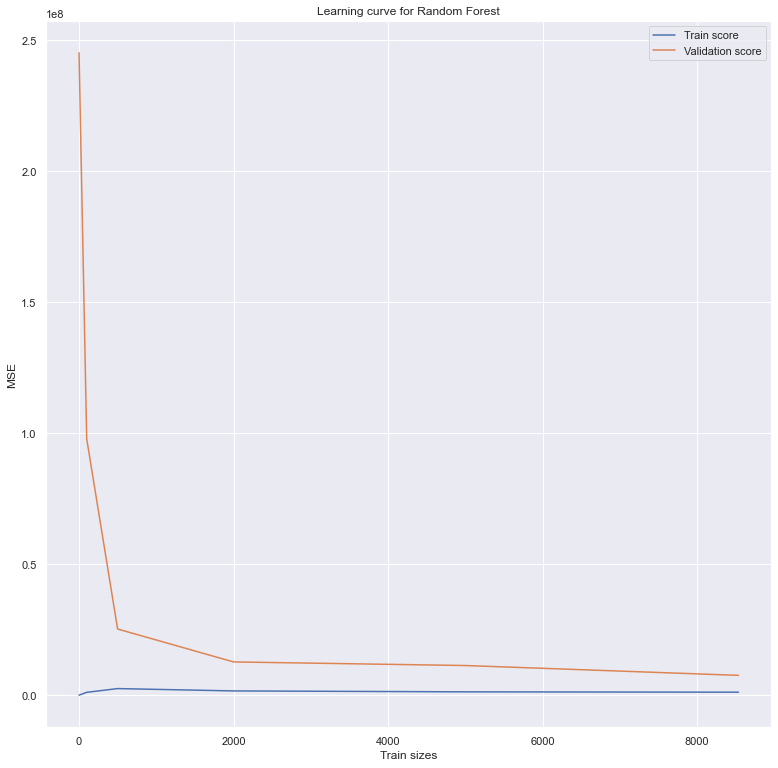

In [96]:
plt.plot(train_sizes, train_scores_mean, label = 'Train score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.legend(loc = 'best')
plt.xlabel('Train sizes')
plt.ylabel('MSE')
plt.title('Learning curve for Random Forest')
plt.show()

* We had a not half bad bayes diffrences

* ıf you interest the learning curves status that are overfitting status, high bayes diffrences, low bayes diffrences
* You can check the README.